In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.google_flight_analysis.scrape import *

In [4]:
orig_array = np.array([
    [0, 480],
    [10, 390],
    [20, 280],
    [30, 200],
    [40, 254],
    [50, 110],
    [60, 96],
    [70, 116],
    [80, 200],
    [90, 270],
    [100, 300],
    [110, 150],
    [120, 130],
    [130, 260],
    [140, 299],
    [150, 260],
    [160, 260],
    [170, 270],
    [180, 250],
    [190, 255],
    [200, 255]
])

In [5]:
step_size = 5

new_rows = []
for i in range(orig_array.shape[0]-1):
    start = orig_array[i, 0]
    end = orig_array[i+1, 0]
    
    # Check the multiples of 5 in between
    for x in range(start+step_size, end, step_size):
        # Generate a random y value in the range of the two points
        y = np.random.randint(min(orig_array[i, 1], orig_array[i+1, 1]), max(orig_array[i, 1], orig_array[i+1, 1]) + 1)
        new_rows.append([x, y])

# Convert list of new rows to a numpy array
new_rows = np.array(new_rows)

# Concatenate the original array with the new rows
final_array = np.concatenate((orig_array, new_rows))

# Sort the final array by the first column
final_array = final_array[final_array[:, 0].argsort()]
final_array

array([[  0, 480],
       [  5, 395],
       [ 10, 390],
       [ 15, 309],
       [ 20, 280],
       [ 25, 274],
       [ 30, 200],
       [ 35, 203],
       [ 40, 254],
       [ 45, 142],
       [ 50, 110],
       [ 55, 109],
       [ 60,  96],
       [ 65, 110],
       [ 70, 116],
       [ 75, 143],
       [ 80, 200],
       [ 85, 211],
       [ 90, 270],
       [ 95, 281],
       [100, 300],
       [105, 263],
       [110, 150],
       [115, 131],
       [120, 130],
       [125, 161],
       [130, 260],
       [135, 280],
       [140, 299],
       [145, 299],
       [150, 260],
       [155, 260],
       [160, 260],
       [165, 261],
       [170, 270],
       [175, 251],
       [180, 250],
       [185, 252],
       [190, 255],
       [195, 255],
       [200, 255]])

In [10]:
# convert array to dataframe
df = pd.DataFrame(final_array[:, 1], index=final_array[:,0], columns=["original"])

n_simulations = 7

# simulate prices with some noise
for i in range(n_simulations):
    noise_scale = np.random.randint(15, 30)
    noise = np.random.normal(loc=0, scale=noise_scale, size=df.shape[0])
    noised_data = df.original + noise
    df["day_" + str(i+1)] = noised_data
  
# compute mean of simulations
df["avg"] = df.mean(axis=1)

# compute the price category based on the quantiles
df["price_cat"] = pd.qcut(df["avg"], q=[0, 0.25, 0.75, 1], labels=["low", "average", "high"])

df

,original,day_1,day_2,day_3,day_4,day_5,day_6,day_7,avg,price_cat
0,480,507.065142,484.827490,486.350871,498.990143,439.932763,506.170563,472.864314,484.525161,high
5,395,382.438376,384.594382,386.371940,404.861387,423.178636,400.029312,405.309931,397.722996,high
10,390,387.592167,390.864615,364.598257,373.970084,374.141687,391.199496,425.350514,387.214602,high
15,309,290.078503,306.865695,321.030821,330.219343,284.066773,324.191126,340.113090,313.195669,high
20,280,302.563385,235.614154,285.956860,300.186284,270.466533,308.371306,290.969693,284.266027,high
25,274,320.234327,294.328710,282.095633,276.594317,266.555692,247.374843,274.270124,279.431706,average
30,200,177.332565,187.675566,167.616985,173.576323,261.138225,205.593537,188.261601,195.149350,average
35,203,217.410637,205.089023,181.598720,191.023472,167.905651,176.646679,264.476766,200.893869,average
40,254,275.677424,264.046420,241.042074,232.520521,321.161362,237.189266,227.167077,256.600518,average
45,142,106.685361,133.559174,126.121030,122.424227,201.669280,141.007433,181.952827,144.427416,low


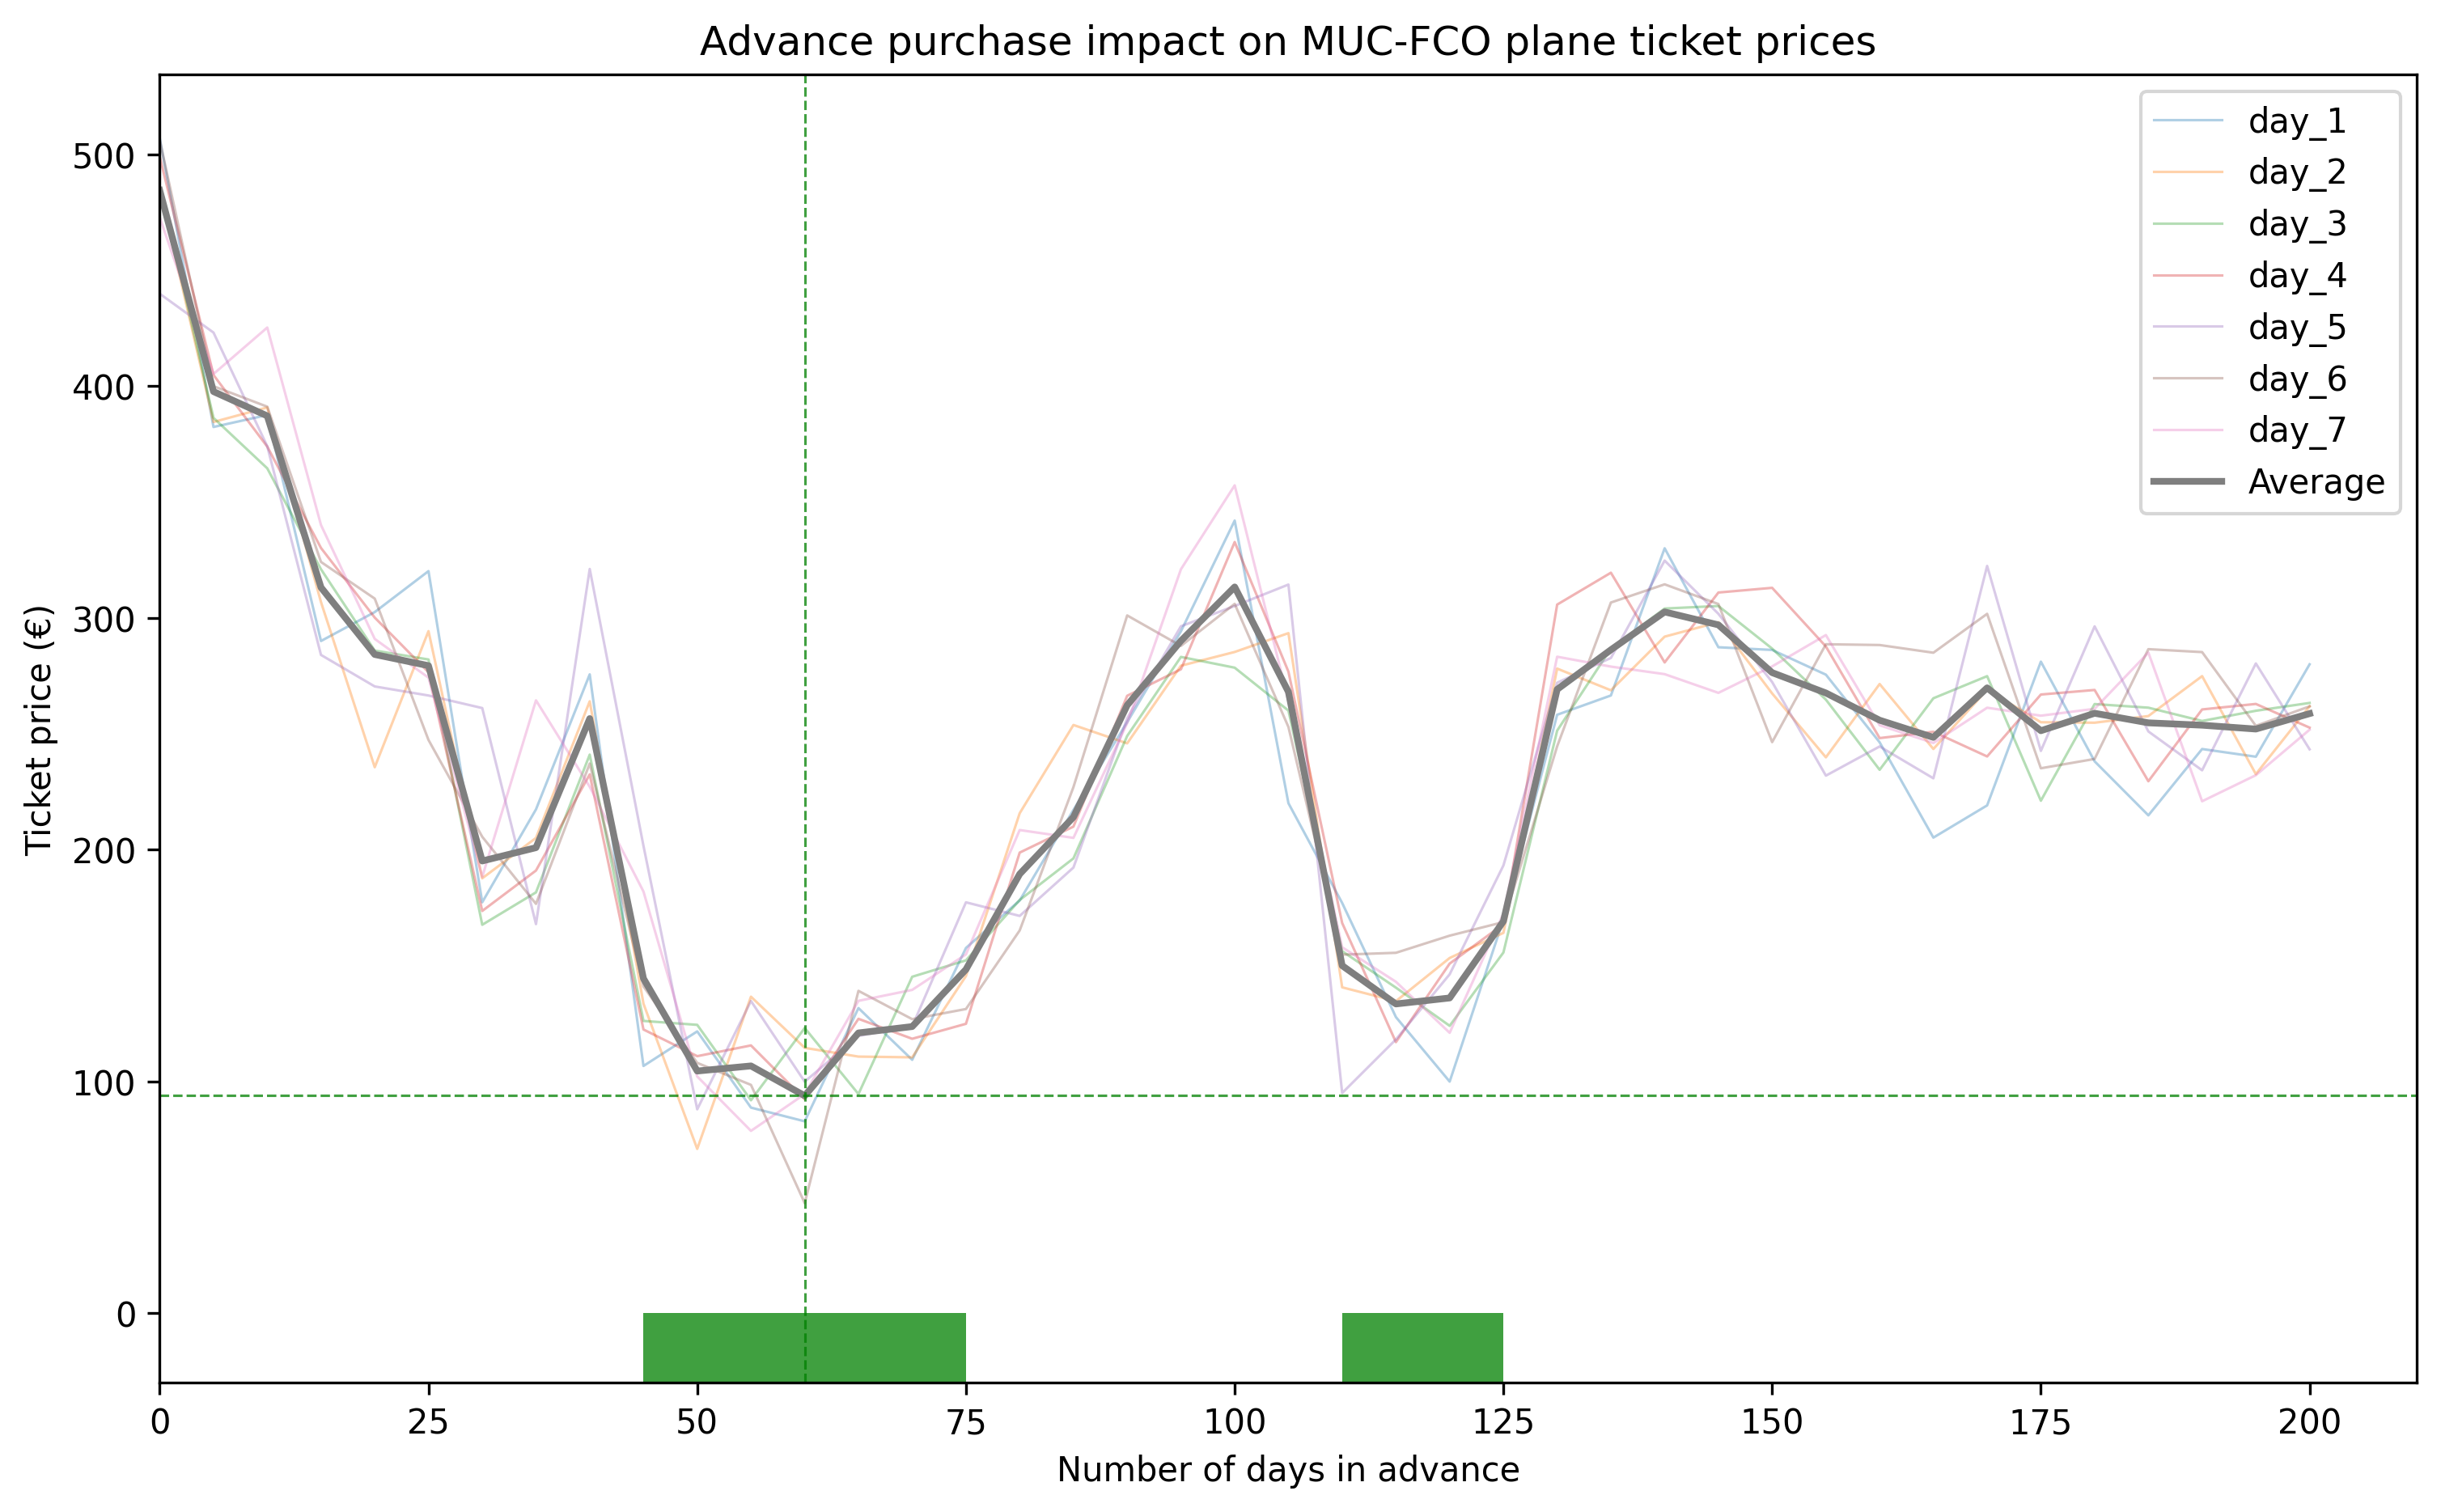

In [11]:
# plot results
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

df.filter(regex='day_').plot(ax=ax, alpha=0.35, linewidth=0.75)
df["avg"].plot(ax=ax, label="Average", linewidth=2)

plt.axhline(df.avg.min(), color="green", linestyle='dashed', linewidth=.75, alpha=.75)
plt.axvline(df.avg.idxmin(), color="green", linestyle='dashed', linewidth=.75, alpha=.75)


ax.set_xlabel("Number of days in advance")
ax.set_ylabel("Ticket price (€)")

ax.set_xlim(left=0); ax.set_ylim(-30, df.avg.max() + 50) 

ax.fill_between(df.index, -30, 0, where=df["price_cat"] == "low", facecolor='green', alpha=0.75)

plt.title("Advance purchase impact on MUC-FCO plane ticket prices")
plt.legend()